In [1]:
# Khai báo thư viện cần dùng

import pandas as pd
import seaborn as sns

In [2]:
# Đọc dữ liệu

df = pd.read_csv('FoodPrice_in_Turkey.csv')
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [3]:
# Xem thông tin dữ liệu các cột

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


In [4]:
# Xem thống kê mô tả

df.describe()

,ProductId,UmId,Month,Year,Price
count,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,254.509687,15.252811,6.479881,2017.458474,15.738709
std,141.008599,25.276665,3.530361,1.499256,22.418284
min,52.000000,5.000000,1.000000,2013.000000,0.253900
25%,114.000000,5.000000,3.000000,2017.000000,3.223600
50%,239.000000,5.000000,6.000000,2018.000000,5.909600
75%,388.000000,5.000000,10.000000,2019.000000,20.441900
max,502.000000,102.000000,12.000000,2019.000000,159.445800


In [5]:
# Loại bỏ giá trị khuyết thiếu

df.dropna()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099
...,...,...,...,...,...,...,...,...
7376,Izmir,502,Cocoa (powder) - Retail,5,KG,8,2019,47.9040
7377,Izmir,502,Cocoa (powder) - Retail,5,KG,9,2019,49.1176
7378,Izmir,502,Cocoa (powder) - Retail,5,KG,10,2019,50.8347
7379,Izmir,502,Cocoa (powder) - Retail,5,KG,11,2019,51.7985


#### Vẽ biểu đồ xu hướng

Lọc dữ liệu sản phẩm gạo, vẽ biểu đồ xu hướng qua các năm

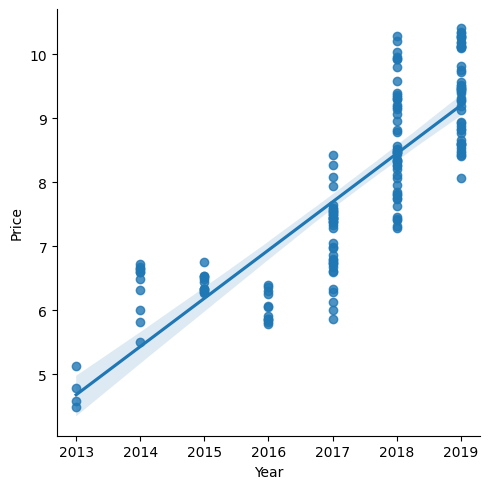

In [6]:
rice_df = df[df["ProductId"] == 52]
sns.lmplot(x="Year", y="Price",data = rice_df)

Có thể nhận thấy rằng giá gạo tăng dần qua các năm

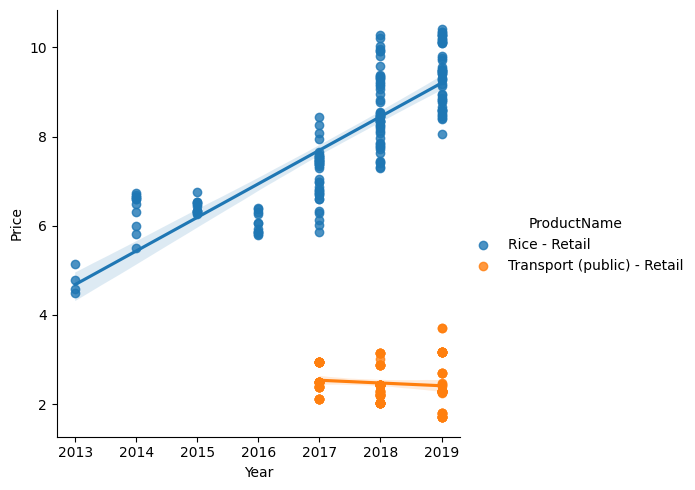

In [7]:
trans_df = df[(df["ProductName"] == "Transport (public) - Retail") | (df["ProductName"] == "Rice - Retail")]
sns.lmplot(x="Year", y="Price", hue="ProductName", data = trans_df)


có thể thấy rằng dù chi phí vận chuyển có xu hướng giảm, tuy nhiên giá gạo vẫn tăng khá mạnh, chứng tỏ không có sự liên quan giữa 2 thuộc tính này

### Vẽ biểu đồ phân bố

Biểu đồ phân bố cho giá sản phẩm

<Axes: ylabel='Price'>

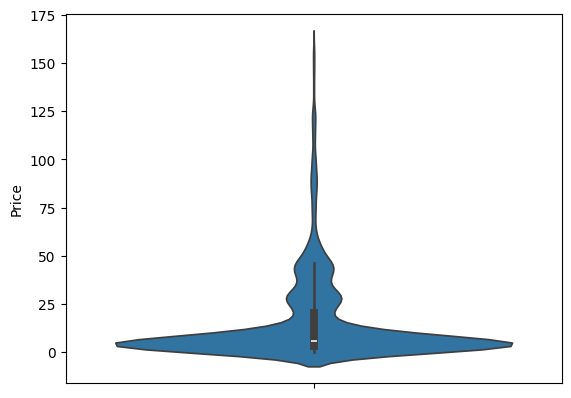

In [8]:
sns.violinplot(y = "Price", data=df)

Có thể nhận tháy dữ liệu phân bố không được đều, nhiều sản phẩm giá thấp và ít sản phẩm giá cao.

<Axes: ylabel='Year'>

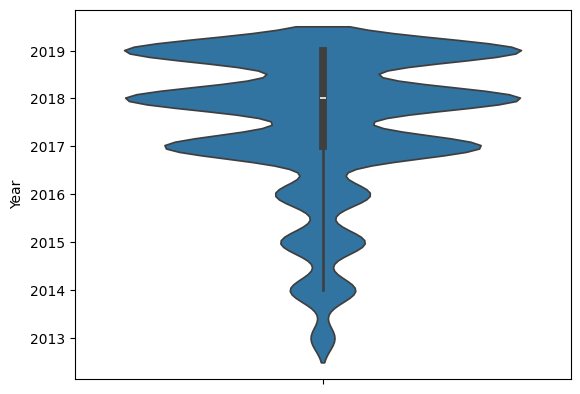

In [9]:
# Biểu đồ phân bố cho năm của sản phẩm

sns.violinplot(y = "Year", data=df)

Có thể thấy rằng sản phẩm chủ yếu thuộc những năm gần đây, những năm càng xa thì số lượng càng ít

### Vẽ biểu đồ tần số

vẽ biểu đồ tần số cho các sản phẩm theo năm

<Axes: xlabel='Year', ylabel='count'>

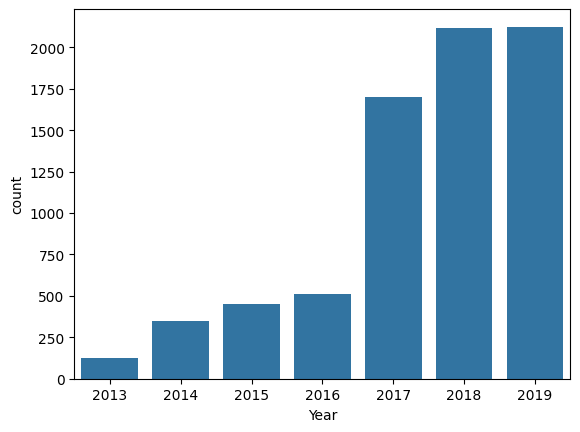

In [10]:
sns.countplot(x = "Year", data = df)

Tương tự như đã nhận xét ở phần trước, những năm càng xa thì càng ít sản phẩm

<Axes: xlabel='Place', ylabel='count'>

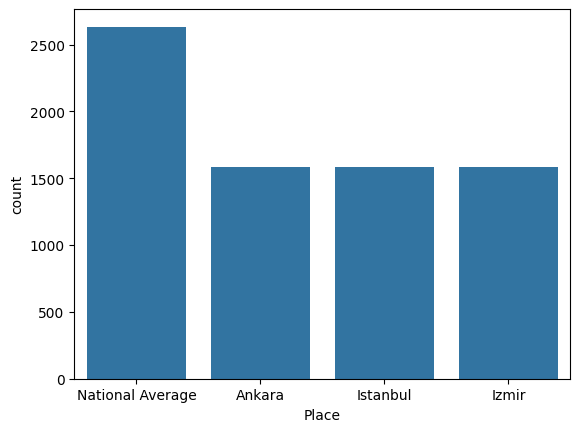

In [11]:
# Thống kê sản phẩm theo địa điểm

sns.countplot(x='Place', data = df)

<Axes: xlabel='Year', ylabel='count'>

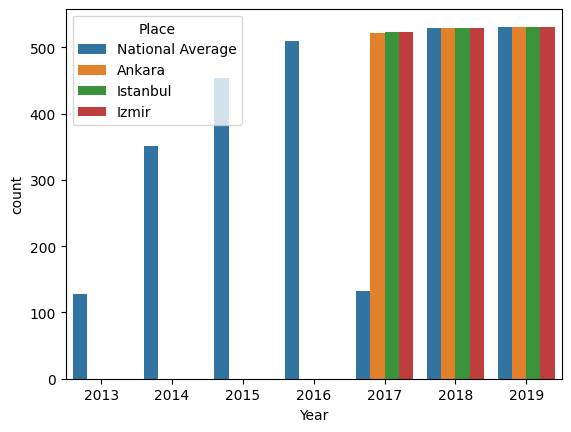

In [12]:
# Hiển thị quan hệ giữa số lượng theo năm được nhóm theo địa điểm

sns.countplot(x = "Year", hue = "Place", data = df)

### Vẽ biểu đồ box plot

Vẽ biểu đồ box plot cho thuộc tính giá sản phẩm

<Axes: xlabel='Price'>

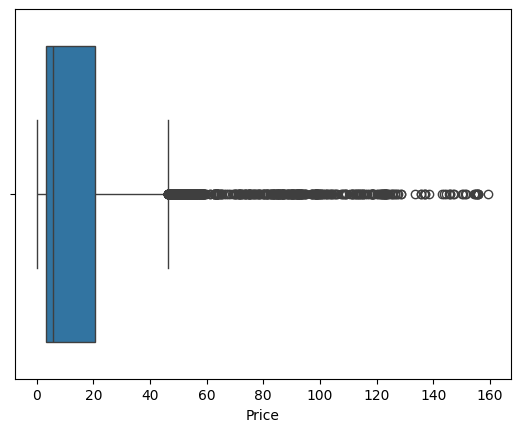

In [13]:
sns.boxplot(x=df["Price"])

Tương tự như trên đã nhận xét, giá sản phẩm phân bố rất không đồng đều, tập trung ở giá thấp

<Axes: xlabel='Year', ylabel='Price'>

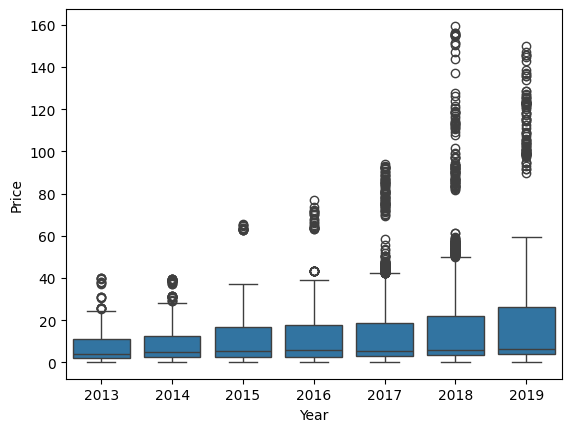

In [14]:
# Vẽ biểu đồ box plot giá sản phẩm phân bố theo năm

sns.boxplot(x = "Year", y = "Price", data=df)